# **Project description and introduction**

i'm an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. 

The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
i am going to carry out a preliminary analysis of the plans based on a relatively small client selection. i have the data on 500 Megaline clients: 

who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. i am going to analyze clients' behavior and determine which prepaid plan brings in more revenue to Megaline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as st
import scipy.stats as levene
import datetime as dt
import seaborn as sns
from functools import reduce

In [2]:
ml_calls= pd.read_csv('/datasets/megaline_calls.csv')
ml_internet= pd.read_csv('/datasets/megaline_internet.csv') 
ml_messages= pd.read_csv('/datasets/megaline_messages.csv') 
ml_plans= pd.read_csv('/datasets/megaline_plans.csv') 
ml_users= pd.read_csv('/datasets/megaline_users.csv')

# my work plan is as follow
 **1. Prepare the data**
* Identify and study missing values and bad dtypes in all of the data sets. and after studying them treat them as follow:
* Check for duplicates and NAN in the data sets.
* add month column to ml_calls, ml_internet, ml_messages and take the info from the call_date, session_date and message_date       columns. 
* round up duration in ml_calls
* Groupby each of the next data sets, ml_internet, ml_calls, separately by count and sum of user_id and month columns.
* Groupby ml_messages dataset by count of user_id, month and id columns.
* Merge  ml_internet, ml_calls ml_messages and ml_users into one dataset.
* Turn megabytes into gigabytes and round it up.
* Check nan in the merged dataset and then fill them with zero.
* find For each user the number of calls made and minutes used per month, the number of text messages sent per month, the   
  volume of data per month and the monthly revenue from each user.
 
**2. Analyze the data** 
* in order to examine the mean, variance and standard_deviation of each ultimat and surf plan i intend to plot histograms for   
  each of the next parameters insaid the ultimate and surf plan: sms_total, calls_sum_month, giga_sum_month, total_cost.
  
**3. Test the hypotheses**  
* my last step before writing the final conclusion is to find the average revenue from users of Ultimate and Surf calling plans   differs, and find the average revenue from users in NY-NJ area is different from that of the users from other regions. 

**4. Write an overall conclusion**

**5. Write a main conclusion**

# 1.  Prepare the data

In [3]:
ml_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [4]:
ml_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [5]:
ml_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
ml_calls.isnull().sum() / len(ml_calls)

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

**Change the call_date column from an object to a datetime64, and add a month column that will be taken from the call date column.**

In [7]:
ml_calls['call_date'] = pd.to_datetime(ml_calls.call_date, format='%Y-%m-%d')

In [8]:
ml_calls['month'] = pd.DatetimeIndex(ml_calls['call_date']).month

In [9]:
ml_calls.info()
print(ml_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB
              id  user_id  call_date  duration  month
0        1000_93     1000 2018-12-27      8.52     12
1       1000_145     1000 2018-12-27     13.66     12
2       1000_247     1000 2018-12-27     14.48     12
3       1000_309     1000 2018-12-28      5.76     12
4       1000_380     1000 2018-12-30      4.22     12
...          ...      ...        ...       ...    ...
137730  1499_199     1499 2018-11-21      8.72     11
137731  1499_200     1499 2018-10-20     

In [10]:
ml_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [11]:
ml_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [12]:
ml_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


**Change the session_date column from an object to a datetime64, and add a month column that will be taken from the session_date column.**


In [13]:
ml_internet['session_date'] = pd.to_datetime(ml_internet.session_date, format='%Y-%m-%d')

In [14]:
ml_internet['month'] = pd.DatetimeIndex(ml_internet['session_date']).month

In [15]:
ml_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


In [16]:
ml_internet.isnull().sum()/ len(ml_internet)

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
month           0.0
dtype: float64

In [17]:
ml_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [18]:
ml_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [19]:
ml_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**Change the message_date column from an object to a datetime64, and add a month column that will be taken from the message_date column.**


In [20]:
ml_messages.isnull().sum()/ len(ml_messages)

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

In [21]:
ml_messages['message_date'] = pd.to_datetime(ml_messages.message_date, format='%Y-%m-%d')

In [22]:
ml_messages['month'] = pd.DatetimeIndex(ml_messages['message_date']).month

In [23]:
ml_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


In [24]:
ml_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [25]:
ml_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [26]:
ml_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [27]:
ml_users.isnull().sum()/len(ml_users)

user_id       0.000
first_name    0.000
last_name     0.000
age           0.000
city          0.000
reg_date      0.000
plan          0.000
churn_date    0.932
dtype: float64

* **add the date 2018-12-31 as the date the user stopped using the service and change the churn_date column from an object to a datetime64.**   

* **change reg_date column from an object to a datetime64**

In [28]:
ml_users['churn_date']=ml_users['churn_date'].fillna(pd.to_datetime('2018-12-31'))

In [29]:
ml_users['reg_date'] = pd.to_datetime(ml_users.reg_date, format='%Y-%m-%d')
ml_users['churn_date'] = pd.to_datetime(ml_users.churn_date, format='%Y-%m-%d')


In [30]:
ml_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [31]:
ml_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31


In [32]:
ml_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [33]:
ml_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [34]:
ml_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


 **Check for duplicates**

In [35]:
ml_users.duplicated().sum()

0

In [36]:
ml_calls.duplicated().sum()

0

In [37]:
ml_internet.duplicated().sum()

0

In [38]:
ml_messages.duplicated().sum()

0

In [39]:
ml_plans.duplicated().sum()

0

**round up duration in ml_calls**

In [40]:
ml_calls['duration'] = ml_calls['duration'].apply(np.ceil)

In [41]:
ml_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11
137731,1499_200,1499,2018-10-20,11.0,10
137732,1499_201,1499,2018-09-21,9.0,9
137733,1499_202,1499,2018-10-10,1.0,10


# sub conclusion and further steps

Up to this point we have identified and investigated missing values ​​and poor dtypes in all data sets.
I also checked for duplicates and NANs in the data sets.
I added a month column to ml_calls, ml_internet, ml_messages and took the information from the call_date, session_date and message_date columns and rounded up duration in ml_calls.

from this point on i will separately groupby each of the next data sets, ml_internet, ml_calls, by count and sum of user_id and month columns.
* Groupby ml_messages dataset by count of user_id, month and id columns.
* Merge  ml_internet, ml_calls ml_messages and ml_users into one dataset.
* Turn megabytes into gigabytes and round it up.
* Check nan in the merged dataset and then fill them with zero.
* find For each user the number of calls made and minutes used per month, the number of text messages sent per month, the   
  volume of data per month and the monthly revenue from each user.

**groupby ml_calls**

In [42]:
calls_data = ml_calls.groupby(['user_id', 'month']).duration.agg(['count', 'sum'])
calls_data.columns = ['calls_month', 'sum_calls_per_month']
calls_data

calls_month  sum_calls_per_month
user_id month                                  
1000    12              16                124.0
1001    8               27                182.0
        9               49                315.0
        10              65                393.0
        11              64                426.0
...                    ...                  ...
1498    12              39                339.0
1499    9               41                346.0
        10              53                385.0
        11              45                308.0
        12              65                496.0

[2258 rows x 2 columns]

In [43]:
calls_data.isnull().sum()

calls_month            0
sum_calls_per_month    0
dtype: int64

In [44]:
ml_internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


**groupby ml_internet**

In [45]:
internet_data = ml_internet.groupby(['user_id', 'month']).mb_used.agg(['count', 'sum'])
internet_data.columns = ['sessions_month', 'mb_per_month']
internet_data

sessions_month  mb_per_month
user_id month                              
1000    12                  5       1901.47
1001    8                  25       6919.15
        9                  53      13314.82
        10                 56      22330.49
        11                 51      18504.30
...                       ...           ...
1498    12                 65      23137.69
1499    9                  45      12984.76
        10                 61      19492.43
        11                 49      16813.83
        12                 65      22059.21

[2277 rows x 2 columns]

In [46]:
ml_messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


**groupby ml_messages**

In [47]:
messages_data = ml_messages.groupby(['user_id', 'month'])[['id']].count()
messages_data.columns = ['sms_total']
messages_data

sms_total
user_id month           
1000    12            11
1001    8             30
        9             44
        10            53
        11            36
...                  ...
1496    9             21
        10            18
        11            13
        12            11
1497    12            50

[1806 rows x 1 columns]

**Merge  ml_internet, ml_calls ml_messages and ml_users into one dataset**

In [48]:
data_frames = [messages_data, calls_data, internet_data]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','month'],
                                            how='outer'), data_frames)
df_merged

sms_total  calls_month  sum_calls_per_month  sessions_month  \
user_id month                                                                
1000    12          11.0         16.0                124.0             5.0   
1001    8           30.0         27.0                182.0            25.0   
        9           44.0         49.0                315.0            53.0   
        10          53.0         65.0                393.0            56.0   
        11          36.0         64.0                426.0            51.0   
...                  ...          ...                  ...             ...   
1499    10           NaN         53.0                385.0            61.0   
        11           NaN         45.0                308.0            49.0   
        12           NaN         65.0                496.0            65.0   
1108    12           NaN          NaN                  NaN             2.0   
1311    6            NaN          NaN                  NaN             9.0   

               mb_per_month  
user_id month                
1000    12          1901.47  
1001    8           6919.15  
        9          13314.82  
        10         22330.49  
        11         18504.30  
...                     ...  
1499    10         19492.43  
        11         16813.83  
        12         22059.21  
1108    12           233.17  
1311    6           1498.83  

[2293 rows x 5 columns]

**Turn megabytes into gigabytes and round it up**

In [49]:
df_merged['mb_per_month']=df_merged['mb_per_month']/1024

In [50]:
df_merged['mb_per_month'] = df_merged['mb_per_month'].apply(np.ceil)

**merge ml_internet, ml_calls ml_messages and ml_users into one dataset**

In [51]:
merged_data = pd.concat([df_merged],axis=1).reset_index().merge(ml_users,on='user_id')
merged_data.columns = ['user_id','month','sms_total','calls_month','calls_sum_month','sessions_month','giga_sum_month','first_name','last_name','age','city','reg_date','plan','churn_date']
merged_data

,user_id,month,sms_total,calls_month,calls_sum_month,sessions_month,giga_sum_month,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,11.0,16.0,124.0,5.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,8,30.0,27.0,182.0,25.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1001,9,44.0,49.0,315.0,53.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
3,1001,10,53.0,65.0,393.0,56.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
4,1001,11,36.0,64.0,426.0,51.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1499,9,NaN,41.0,346.0,45.0,13.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31
2289,1499,10,NaN,53.0,385.0,61.0,20.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31
2290,1499,11,NaN,45.0,308.0,49.0,17.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31
2291,1499,12,NaN,65.0,496.0,65.0,22.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31


**Check nan in the merged dataset**

In [52]:
merged_data.isnull().sum()

user_id              0
month                0
sms_total          487
calls_month         35
calls_sum_month     35
sessions_month      16
giga_sum_month      16
first_name           0
last_name            0
age                  0
city                 0
reg_date             0
plan                 0
churn_date           0
dtype: int64

**fill NAN with zero**

In [53]:
merged_data = merged_data.fillna(0)
merged_data

,user_id,month,sms_total,calls_month,calls_sum_month,sessions_month,giga_sum_month,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,11.0,16.0,124.0,5.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,8,30.0,27.0,182.0,25.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1001,9,44.0,49.0,315.0,53.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
3,1001,10,53.0,65.0,393.0,56.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
4,1001,11,36.0,64.0,426.0,51.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1499,9,0.0,41.0,346.0,45.0,13.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31
2289,1499,10,0.0,53.0,385.0,61.0,20.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31
2290,1499,11,0.0,45.0,308.0,49.0,17.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31
2291,1499,12,0.0,65.0,496.0,65.0,22.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31


In [54]:
merged_data.isnull().sum()

user_id            0
month              0
sms_total          0
calls_month        0
calls_sum_month    0
sessions_month     0
giga_sum_month     0
first_name         0
last_name          0
age                0
city               0
reg_date           0
plan               0
churn_date         0
dtype: int64

# Description of the plans

**Surf**

* Monthly charge: $20

* 500 monthly minutes, 50 texts, and 15 GB of data

* After exceeding the package limits:

* 1 minute: 3 cents

* 1 text message: 3 cents

* 1 GB of data: $10

**Ultimate**
* Monthly charge: $70

* 3000 monthly minutes, 1000 text messages, and 30 GB of data

* After exceeding the package limits:

* 1 minute: 1 cent

* 1 text message: 1 cent

* 1 GB of data: $7

**by using row accessor i will take each row of each user separately
so i'm creating variables of prepaid plans/monthly minutes/texts/GB of data inside the function and i can operate them for   
  each user.**
 * find the rate for user using our parameter plan. i will create new variable total_cost.
 * find the cost of calls.
 * find the cost of sms.
 * find the cost of GB_of_data.
 * calculate the total cost by simply summing it all up.

In [55]:
def cost(row):
    #by using row accessor i will take each row of each user separately
    # so i'm creating variables of prepaid plans/monthly minutes/texts/GB of data inside the function
    # and i can operate them for each user
    prepaid_plan=row['plan']
    calls=row['calls_sum_month']
    text =row['sms_total']
    GB_of_data=row['giga_sum_month']
    
    # find the rate for user using our parameter plan. i will create new variable total_cost.
    if prepaid_plan=='surf':
        plan_cost=20
    else:
        plan_cost=70
    
    # find the cost of calls. 
    if  calls>500 and prepaid_plan=='surf':
        calls_cost=0.03* (calls-500)
    elif calls>3000 and prepaid_plan=='ultimate':
        calls_cost= 0.01*(calls-3000)
    else:
        calls_cost=0
    
    # find the cost of sms
    if text>50 and prepaid_plan == 'surf':
        sms_cost=0.03*(text-50)
    elif text>1000 and prepaid_plan=='ultimate':
        sms_cost= 0.01*(text-1000)
    else:
        sms_cost=0
    # find the cost of GB_of_data
    if  GB_of_data>15 and prepaid_plan=='surf':
        GB_of_data_cost=10*(GB_of_data-15)
    elif GB_of_data>30 and prepaid_plan=='ultimate':
        GB_of_data_cost=7*(GB_of_data-30)
    else:
        GB_of_data_cost=0
     
    # calculate the total cost by simply summing it all up
    total_cost=plan_cost+calls_cost+sms_cost+GB_of_data_cost
    return total_cost

In [56]:
merged_data['total_cost']=merged_data.apply(cost,axis=1)
merged_data

,user_id,month,sms_total,calls_month,calls_sum_month,sessions_month,giga_sum_month,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
0,1000,12,11.0,16.0,124.0,5.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,70.00
1,1001,8,30.0,27.0,182.0,25.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,20.00
2,1001,9,44.0,49.0,315.0,53.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,20.00
3,1001,10,53.0,65.0,393.0,56.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,90.09
4,1001,11,36.0,64.0,426.0,51.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1499,9,0.0,41.0,346.0,45.0,13.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,20.00
2289,1499,10,0.0,53.0,385.0,61.0,20.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,70.00
2290,1499,11,0.0,45.0,308.0,49.0,17.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,40.00
2291,1499,12,0.0,65.0,496.0,65.0,22.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,90.00


# 2. Analyze the data 

In [57]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    merged_data[parameter].hist()
    plt.show()
    if merged_data[parameter].mean()>merged_data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
        print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(merged_data[parameter].describe())
    
    

The histogram of: sms_total


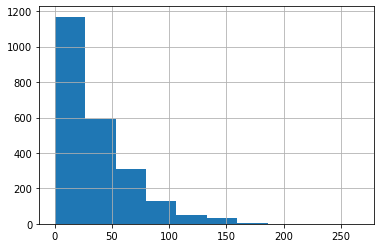

The distribution is skewed to the right
Statistics on: sms_total
count    2293.000000
mean       33.166594
std        34.070085
min         0.000000
25%         3.000000
50%        26.000000
75%        51.000000
max       266.000000
Name: sms_total, dtype: float64
The histogram of: calls_sum_month


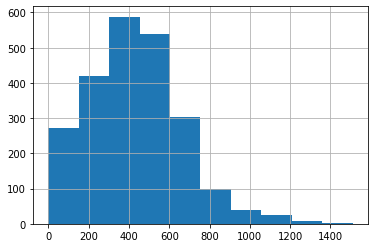

The distribution is skewed to the right
Statistics on: calls_sum_month
count    2293.000000
mean      429.283471
std       236.320077
min         0.000000
25%       265.000000
50%       425.000000
75%       572.000000
max      1510.000000
Name: calls_sum_month, dtype: float64
The histogram of: giga_sum_month


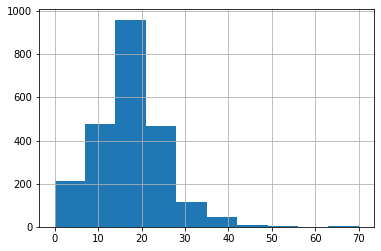

The distribution is skewed to the left
---------------------------------------
Statistics on: giga_sum_month
count    2293.000000
mean       16.870475
std         7.796174
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: giga_sum_month, dtype: float64
The histogram of: total_cost


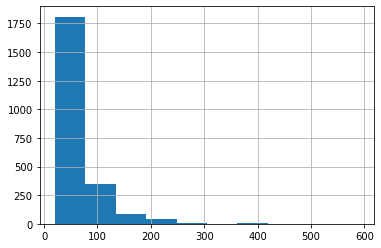

The distribution is skewed to the left
---------------------------------------
Statistics on: total_cost
count    2293.000000
mean       64.351147
std        46.624945
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: total_cost, dtype: float64


In [58]:
for parameter in ['sms_total','calls_sum_month', 'giga_sum_month', 'total_cost']:
    distribution_percentile(parameter)

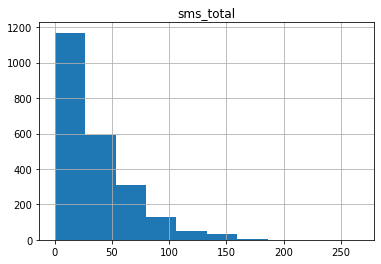

In [59]:
merged_data.hist('sms_total', bins=10, range=(0,266))
plt.show()

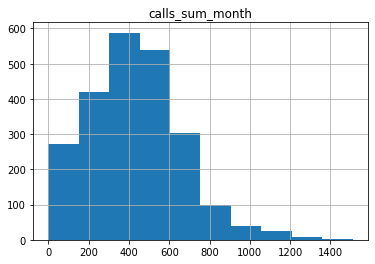

In [60]:
merged_data.hist('calls_sum_month', bins=10, range=(0,1510))
plt.show()

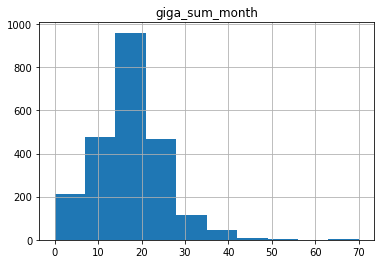

In [61]:
merged_data.hist('giga_sum_month', bins=10, range=(0,70))
plt.show()

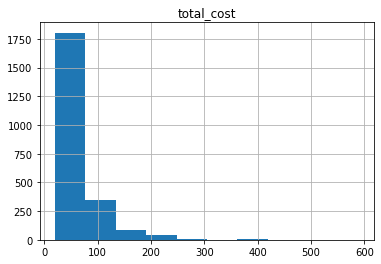

In [62]:
merged_data.hist('total_cost', bins=10, range=(20,590))
plt.show()

 # plot histograms for the ultimate plan 
 * in order to find and examine the mean, variance and standard_deviation i'm going to plot histograms 
   for each of the next parameters sms_total, calls_sum_month, giga_sum_month, total_cost.

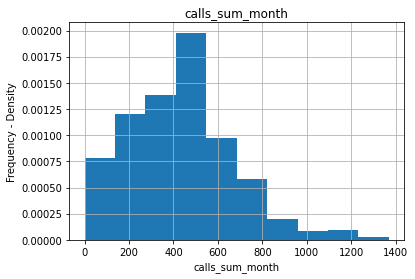

ultimate_minutes_mean: 430.45 ultimate_minutes_variance: 57764.125277777785 ultimate_minutes_standard_deviation: 240.34168443650756
most of the data can be found in this range: (-290.57505330952273, 57764.125277777785)



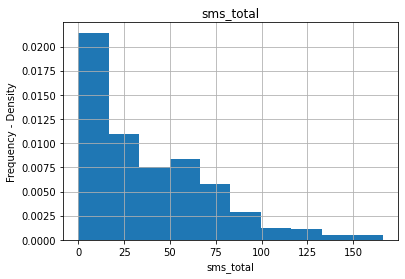

ultimate_sms_mean: 37.55138888888889 ultimate_sms_variance: 1207.0779147376545 ultimate_sms_standard_deviation: 34.743026850544474
most of the data can be found in this range: (-66.67769166274454, 1207.0779147376545)



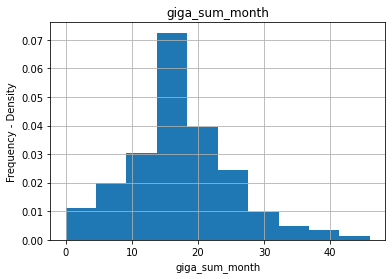

ultimate_giga_sum_month_mean: 17.306944444444444 ultimate_giga_sum_month_variance: 58.748840663580246 ultimate_giga_sum_month_standard_deviation: 7.664779231235578
most of the data can be found in this range: (-5.687393249262289, 58.748840663580246)



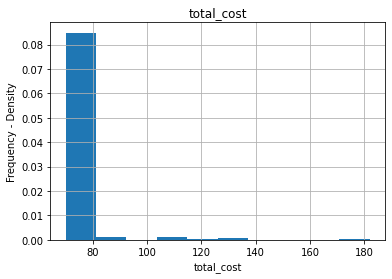

ultimate_total_cost_mean: 72.31388888888888 ultimate_total_cost_variance: 129.66814043209877 ultimate_total_cost_standard_deviation: 11.387191946748715
most of the data can be found in this range: (38.15231304864274, 129.66814043209877)



In [63]:
#ultimate
ultimate_plan_users = merged_data.query('plan == "ultimate"')

#calls_sum_month
ultimate_minutes_mean = ultimate_plan_users['calls_sum_month'].mean()
ultimate_minutes_variance = np.var(ultimate_plan_users['calls_sum_month'])
ultimate_minutes_standard_deviation = np.sqrt(ultimate_minutes_variance)
ultimate_plan_users.hist('calls_sum_month', density=True)
plt.xlabel('calls_sum_month')
plt.ylabel('Frequency - Density')
plt.show()
print('ultimate_minutes_mean:', ultimate_minutes_mean, 'ultimate_minutes_variance:', ultimate_minutes_variance, 'ultimate_minutes_standard_deviation:', ultimate_minutes_standard_deviation)
print('most of the data can be found in this range:', (ultimate_minutes_mean - 3 * ultimate_minutes_standard_deviation, ultimate_minutes_variance))
print()

#sms_total
ultimate_sms_mean = ultimate_plan_users['sms_total'].mean()
ultimate_sms_variance = np.var(ultimate_plan_users['sms_total'])
ultimate_sms_standard_deviation = np.sqrt(ultimate_sms_variance)
ultimate_plan_users.hist('sms_total', density=True)
plt.xlabel('sms_total')
plt.ylabel('Frequency - Density')
plt.show()
print('ultimate_sms_mean:', ultimate_sms_mean, 'ultimate_sms_variance:', ultimate_sms_variance, 'ultimate_sms_standard_deviation:', ultimate_sms_standard_deviation)
print('most of the data can be found in this range:', (ultimate_sms_mean - 3 * ultimate_sms_standard_deviation, ultimate_sms_variance))
print()

#giga_sum_month
ultimate_giga_sum_month_mean = ultimate_plan_users['giga_sum_month'].mean()
ultimate_giga_sum_month_variance = np.var(ultimate_plan_users['giga_sum_month'])
ultimate_giga_sum_month_standard_deviation = np.sqrt(ultimate_giga_sum_month_variance)
ultimate_plan_users.hist('giga_sum_month', density=True)
plt.xlabel('giga_sum_month')
plt.ylabel('Frequency - Density')
plt.show()
print('ultimate_giga_sum_month_mean:', ultimate_giga_sum_month_mean, 'ultimate_giga_sum_month_variance:', ultimate_giga_sum_month_variance, 'ultimate_giga_sum_month_standard_deviation:', ultimate_giga_sum_month_standard_deviation)
print('most of the data can be found in this range:', (ultimate_giga_sum_month_mean - 3 * ultimate_giga_sum_month_standard_deviation, ultimate_giga_sum_month_variance))
print()

#total_cost
ultimate_total_cost_mean = ultimate_plan_users['total_cost'].mean()
ultimate_total_cost_variance = np.var(ultimate_plan_users['total_cost'])
ultimate_total_cost_standard_deviation = np.sqrt(ultimate_total_cost_variance)
ultimate_plan_users.hist('total_cost', density=True)
plt.xlabel('total_cost')
plt.ylabel('Frequency - Density')
plt.show()
print('ultimate_total_cost_mean:', ultimate_total_cost_mean, 'ultimate_total_cost_variance:', ultimate_total_cost_variance, 'ultimate_total_cost_standard_deviation:', ultimate_total_cost_standard_deviation)
print('most of the data can be found in this range:', (ultimate_total_cost_mean - 3 * ultimate_total_cost_standard_deviation, ultimate_total_cost_variance))
print()


 # plot histograms for the surf plan 
 
 * in order to find and examine the mean, variance and standard_deviation i'm going to plot histograms 
   for each of the next parameters sms_total, calls_sum_month, giga_sum_month, total_cost.

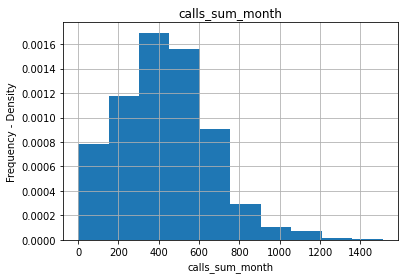

surf_plan_minutes_mean: 428.7495232040687 surf_plan_minutes_variance: 54933.334591317485 surf_plan_minutes_standard_deviation: 234.37861376695076
most of the data can be found in this range: (-274.38631809678355, 54933.334591317485)



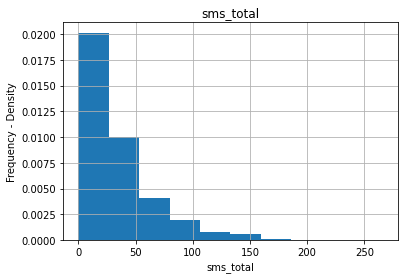

surf_plan_sms_mean: 31.15956770502225 surf_plan_sms_variance: 1126.008231726662 surf_plan_sms_standard_deviation: 33.556046127734746
most of the data can be found in this range: (-69.50857067818198, 1126.008231726662)



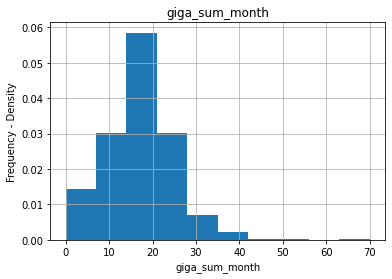

surf_plan_giga_sum_month_mean: 16.670692943420217 surf_plan_giga_sum_month_variance: 61.54444942447023 surf_plan_giga_sum_month_standard_deviation: 7.845027050588814
most of the data can be found in this range: (-6.864388208346224, 61.54444942447023)



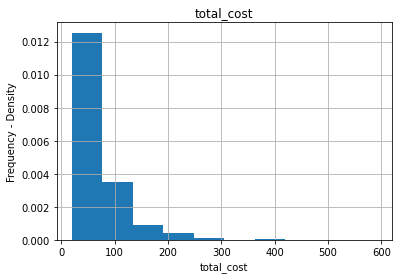

surf_plan_total_cost_mean: 60.706408137317226 surf_plan_total_cost_variance: 3065.8848438690247 surf_plan_total_cost_standard_deviation: 55.37043293915106
most of the data can be found in this range: (-105.40489068013596, 3065.8848438690247)



In [64]:
#surf
surf_plan_users = merged_data.query('plan == "surf"')

#calls_sum_month
surf_plan_minutes_mean = surf_plan_users['calls_sum_month'].mean()
surf_plan_minutes_variance = np.var(surf_plan_users['calls_sum_month'])
surf_plan_minutes_standard_deviation = np.sqrt(surf_plan_minutes_variance)
surf_plan_users.hist('calls_sum_month', density=True)
plt.xlabel('calls_sum_month')
plt.ylabel('Frequency - Density')
plt.show()
print('surf_plan_minutes_mean:', surf_plan_minutes_mean, 'surf_plan_minutes_variance:', surf_plan_minutes_variance, 'surf_plan_minutes_standard_deviation:', surf_plan_minutes_standard_deviation)
print('most of the data can be found in this range:', (surf_plan_minutes_mean - 3 * surf_plan_minutes_standard_deviation, surf_plan_minutes_variance))
print()

#sms_total
surf_plan_sms_mean = surf_plan_users['sms_total'].mean()
surf_plan_sms_variance = np.var(surf_plan_users['sms_total'])
surf_plan_sms_standard_deviation = np.sqrt(surf_plan_sms_variance)
surf_plan_users.hist('sms_total', density=True)
plt.xlabel('sms_total')
plt.ylabel('Frequency - Density')
plt.show()
print('surf_plan_sms_mean:', surf_plan_sms_mean, 'surf_plan_sms_variance:', surf_plan_sms_variance, 'surf_plan_sms_standard_deviation:', surf_plan_sms_standard_deviation)
print('most of the data can be found in this range:', (surf_plan_sms_mean - 3 * surf_plan_sms_standard_deviation, surf_plan_sms_variance))
print()

#giga_sum_month
surf_plan_giga_sum_month_mean = surf_plan_users['giga_sum_month'].mean()
surf_plan_giga_sum_month_variance = np.var(surf_plan_users['giga_sum_month'])
surf_plan_giga_sum_month_standard_deviation = np.sqrt(surf_plan_giga_sum_month_variance)
surf_plan_users.hist('giga_sum_month', density=True)
plt.xlabel('giga_sum_month')
plt.ylabel('Frequency - Density')
plt.show()
print('surf_plan_giga_sum_month_mean:', surf_plan_giga_sum_month_mean, 'surf_plan_giga_sum_month_variance:', surf_plan_giga_sum_month_variance, 'surf_plan_giga_sum_month_standard_deviation:', surf_plan_giga_sum_month_standard_deviation)
print('most of the data can be found in this range:', (surf_plan_giga_sum_month_mean - 3 * surf_plan_giga_sum_month_standard_deviation, surf_plan_giga_sum_month_variance))
print()

#total_cost
surf_plan_total_cost_mean = surf_plan_users['total_cost'].mean()
surf_plan_total_cost_variance = np.var(surf_plan_users['total_cost'])
surf_plan_total_cost_standard_deviation = np.sqrt(surf_plan_total_cost_variance)
surf_plan_users.hist('total_cost', density=True)
plt.xlabel('total_cost')
plt.ylabel('Frequency - Density')
plt.show()
print('surf_plan_total_cost_mean:', surf_plan_total_cost_mean, 'surf_plan_total_cost_variance:', surf_plan_total_cost_variance, 'surf_plan_total_cost_standard_deviation:', surf_plan_total_cost_standard_deviation)
print('most of the data can be found in this range:', (surf_plan_total_cost_mean - 3 * surf_plan_total_cost_standard_deviation, surf_plan_total_cost_variance))
print()

# 3.Test the hypotheses

**find the average revenue from users of Ultimate and Surf calling plans   differs**

H0:The average revenue from Surf users is == The average revenue from Ultimate users.

H1:The average revenue from Surf users is != The average revenue from Ultimate users.

In [65]:
st.levene(surf_plan_users['total_cost'], ultimate_plan_users['total_cost'], center='mean')

LeveneResult(statistic=594.6026163420061, pvalue=5.915081558303153e-117)

In [66]:
alpha = 0.05
result1 = st.ttest_ind(surf_plan_users['total_cost'],ultimate_plan_users['total_cost'], equal_var = False)
print('p-valuse: ', result1.pvalue)

if (result1.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    
surf_mean = surf_plan_users['total_cost'].mean()
ultimate_mean = ultimate_plan_users['total_cost'].mean()
print('surf mean: $' , surf_mean)
print('ultimate mean: $', ultimate_mean)

p-valuse:  3.17039054811355e-15
We reject the null hypothesis
surf mean: $ 60.706408137317226
ultimate mean: $ 72.31388888888888


**find the average revenue from users in NY-NJ area is different from that of the users from other regions**

In [67]:
ny_nj_users = merged_data[merged_data['city'].str.contains("NY-NJ")]

In [68]:
other_regions_users = merged_data[~merged_data['city'].str.contains("NY-NJ")]

H0:The average revenue from users in NY-NJ area is == The average revenue from the users of other regions.

H1:The average revenue from users in NY-NJ area is == The average revenue from the users of other regions.

In [69]:
st.levene(ny_nj_users['total_cost'], other_regions_users['total_cost'], center='mean')

LeveneResult(statistic=1.8415947578436047, pvalue=0.17489782767369766)

In [70]:
alpha = 0.05
result2 = st.ttest_ind(ny_nj_users['total_cost'],other_regions_users['total_cost'], equal_var = True)
print('p-valuse: ', result2.pvalue)

if (result2.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    
ny_nj_users_mean = ny_nj_users['total_cost'].mean()
other_regions_users_mean = other_regions_users['total_cost'].mean()
print('NY NJ users mean: $', ny_nj_users_mean)
print('Other regions users mean: $', other_regions_users_mean)

p-valuse:  0.043557431621342436
We reject the null hypothesis
NY NJ users mean: $ 59.921352785145885
Other regions users mean: $ 65.2227713987474


**find the average revenue from surf users in NY-NJ area is different from that of the ultimate users in NY-NJ area**

In [71]:
ny_nj_users_surf = surf_plan_users[surf_plan_users['city'].str.contains("NY-NJ")]

In [72]:
ny_nj_users_surf 

,user_id,month,sms_total,calls_month,calls_sum_month,sessions_month,giga_sum_month,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
37,1014,11,9.0,28.0,163.0,1.0,2.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,2018-12-31,20.00
38,1014,12,64.0,150.0,1114.0,19.0,8.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,2018-12-31,38.84
59,1027,7,18.0,46.0,347.0,38.0,12.0,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,2018-12-31,20.00
60,1027,8,13.0,49.0,361.0,54.0,20.0,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,2018-12-31,70.00
61,1027,9,12.0,53.0,325.0,48.0,17.0,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,2018-12-31,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,1498,8,0.0,44.0,266.0,59.0,20.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,70.00
2284,1498,9,0.0,45.0,363.0,57.0,23.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,100.00
2285,1498,10,0.0,46.0,298.0,64.0,21.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,80.00
2286,1498,11,0.0,41.0,223.0,57.0,19.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,60.00


In [73]:
ny_nj_users_ultimate = ultimate_plan_users[ultimate_plan_users['city'].str.contains("NY-NJ")]

In [74]:
ny_nj_users_ultimate

,user_id,month,sms_total,calls_month,calls_sum_month,sessions_month,giga_sum_month,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
84,1031,7,1.0,36.0,304.0,34.0,11.0,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,2018-12-31,70.0
85,1031,8,2.0,62.0,483.0,63.0,22.0,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,2018-12-31,70.0
86,1031,9,3.0,76.0,515.0,46.0,13.0,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,2018-12-31,70.0
87,1031,10,2.0,74.0,563.0,57.0,19.0,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,2018-12-31,70.0
88,1031,11,1.0,85.0,611.0,51.0,16.0,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,2018-12-31,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,1482,10,2.0,0.0,0.0,0.0,0.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,2018-12-31,70.0
1783,1482,11,87.0,115.0,785.0,69.0,20.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,2018-12-31,70.0
1784,1482,12,5.0,5.0,56.0,1.0,1.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,2018-12-31,70.0
1903,1063,11,0.0,9.0,67.0,35.0,11.0,Larhonda,Hartman,60,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,ultimate,2018-12-31,70.0


H0:The average revenue from surf users in NY-NJ area is == The average revenue from the ultimate users in NY-NJ area.

H1:The average revenue from surf users in NY-NJ area is != The average revenue from the ultimate users in NY-NJ area.

In [75]:
st.levene(ny_nj_users_surf['total_cost'], ny_nj_users_ultimate['total_cost'], center='mean')

LeveneResult(statistic=49.85336527325695, pvalue=8.084871416953014e-12)

In [76]:
alpha = 0.05
result3 = st.ttest_ind(ny_nj_users_surf['total_cost'],ny_nj_users_ultimate['total_cost'], equal_var = False)
print('p-valuse: ', result2.pvalue)

if (result3.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    
ny_nj_users_surf_mean = ny_nj_users_surf['total_cost'].mean()
ny_nj_users_ultimate_mean = ny_nj_users_ultimate['total_cost'].mean()
print('NY NJ surf users mean: $', ny_nj_users_surf_mean)
print('NY NJ ultimate users mean: $', ny_nj_users_ultimate_mean)

p-valuse:  0.043557431621342436
We reject the null hypothesis
NY NJ surf users mean: $ 56.789583333333326
NY NJ ultimate users mean: $ 74.95384615384616


# 4. overall conclusion

I was given 5 seprate data sets containing info about: 
1.users
user_id — unique user identifier
first_name — user's name
last_name — user's last name
age — user's age (years)
reg_date — subscription date (dd, mm, yy)
churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
city — user's city of residence
plan — calling plan name

2.calls
id — unique call identifier
call_date — call date
duration — call duration (in minutes)
user_id — the identifier of the user making the call

3.messages 
id — unique text message identifier
message_date — text message date
user_id — the identifier of the user sending the text

4.interenet
id — unique session identifier
mb_used — the volume of data spent during the session (in megabytes)
session_date — web session date
user_id — user identifier.

5.plans
plan_name — calling plan name
usd_monthly_fee — monthly charge in US dollars
minutes_included — monthly minute allowance
messages_included — monthly text allowance
mb_per_month_included — data volume allowance (in megabytes)
usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
usd_per_message — price per text after exceeding the package limits
usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

in order to analize the data, i needed to merge the files given to me into one file containing all of the necessary data. i started doing the following steps:

## Prepare the data
**looking for Missing values in the datasets** 
* ml_calls- i didn't find any missing values.
* ml_internet-i didn't find any missing values.
* ml_messages- i didn't find any missing values.
* ml_plans- i didn't find any missing values.
* ml_users-i didn't find any missing values.

**fix dtypes**
* ml_calls- change the call_date column from an object to a datetime64.
* ml_internet- change the session_date column from an object to a datetime64.
* ml_messages- change the message_date column from an object to a datetime64. 
* ml_users- add the date 2018-12-31 as the date the user stopped using the service, change the churn_date column, from an       object to a datetime64 and change reg_date column from an object to a datetime64.

**adding columns to to the datasets**
* ml_calls- add a month column that will be taken from the call date column.
* ml_internet- add a month column that will be taken from the session_date column.
* ml_messages- add a month column that will be taken from the message_date column.

after looking for missing values, fixing dtypes and adding necessary month columns i started groupby the relevent datasets.
and started merging the data.

**groupby the datasets and merging the data** 
* ml_internet- by count and sum of user_id and month columns.
* ml_calls- by count and sum of user_id and month columns.
* ml_messages- by count of user_id, month and id columns.
* Merge  ml_internet, ml_calls ml_messages and ml_users into one dataset.
* Turn megabytes into gigabytes and round it up.
* Check NAN in the merged dataset and then fill them with zero sincs  NAN values refer to people who have not used one or more     of the calls, messages or internet.

**by using row accessor i looked for each row of each user separately
  so creating variables of prepaid plans/monthly minutes/texts/GB of data inside the function and i operated them for   
  each user.**
  
**by doing that i found**
* the cost of calls.
* the cost of sms.
* the cost of GB_of_data.
* calculate the total cost by simply summing it all up.
* i created new variable called total_cost. to find the rate for each user using our parameter plan.

## Analyze the data

in order to find and examine the mean, variance and standard_deviation i plot histograms 
for each plans.  of the next parameters sms_total, calls_sum_month, giga_sum_month, total_cost.

**ultimate plan**

i ploted histograms for each of the next parameters sms_total, calls_sum_month, giga_sum_month, total_cost and found the following information:


* calls_sum_month- 
  mean: 430.45 

  variance: 57764.125277777785 
                   
  standard_deviation: 240.3416844365

  most of the data can be found in this range: (-290.57505330952273, 57764.125277777785)


* sms_total-
  mean: 37.55138888888889 

  variance: 1207.0779147376545 

  standard_deviation: 34.743026850544474

  most of the data can be found in this range: (-66.67769166274454, 1207.0779147376545)


* giga_sum_month-

  mean: 17.306944444444444 

  variance: 58.748840663580246 

  standard_deviation: 7.664779231235578

  most of the data can be found in this range: (-5.687393249262289, 58.748840663580246)


* total_cost-

  mean: 72.31388888888888 

  variance: 129.66814043209877 

  standard_deviation: 11.387191946748715

most of the data can be found in this range: (38.15231304864274, 129.66814043209877)

**surf plan**

i ploted histograms for each of the next parameters sms_total, calls_sum_month, giga_sum_month, total_cost.


* calls_sum_month- 

  mean: 428.7495232040687 

  variance: 54933.334591317485 

  standard_deviation: 234.37861376695076

  most of the data can be found in this range: (-274.38631809678355, 54933.334591317485)


* sms_total-

  mean: 31.15956770502225 
  
  variance: 1126.008231726662 
  
  standard_deviation: 33.556046127734746
  
  most of the data can be found in this range: (-69.50857067818198, 1126.008231726662)


* giga_sum_month-

  giga_sum_month_mean: 16.670692943420217 
  
  giga_sum_month_variance: 61.54444942447023           
  
  giga_sum_month_standard_deviation: 7.845027050588814
  
  most of the data can be found in this range: (-6.864388208346224, 61.54444942447023)


* total_cost-

  total_cost_mean: 60.706408137317226 
  
  total_cost_variance: 3065.8848438690247 
  
  total_cost_standard_deviation: 55.37043293915106

  most of the data can be found in this range: (-105.40489068013596, 3065.8848438690247)

 

# 5. Main conclusion

**After testing the hypotheses that claims average revenue from users of Ultimate and Surf calling plans differs we can see that the null hypothisis is rejected, the average revenue from users of Ultimate and Surf calling plans do differ and we can see the ultimate users are more profitable.
i used st.levene to compare the Ultimate and Surf 'total cost' columns means by that got a  very small p.value which made me set the ttest equal = false, and alpha to 0.05**

**After testing the hypotheses that claims that the average revenue from users in NY-NJ area is different of the users from other regions the  we can see that the average revenue from users in NY-NJ area is different from that of the users from other regions, and the null hypothisis rejected again and we can see that NY-NJ area users are more profitable.
i used st.levene again to compare the NY-NJ area and other regions 'total cost' columns means by that got a  bit larger but still small p.value which made me set the ttest equal = True, and alpha to 0.05**

**After testing the hypotheses that claims the average revenue from surf users in NY-NJ area is different from that of the  ultimate users in NY-NJ area. we can see that the average revenue from surf users in NY-NJ area is different from that of the ultimate users in NY-NJ area and we can see that  ultimate users are more profitable.
i used st.levene to compare the NY-NJ area surf and ultimate 'total cost' columns means by that got again a very small p.value which made me set the ttest equal = False, and alpha to 0.05**


